In [41]:
import pandas as pd

In [42]:
df = pd.read_csv('Reviews.csv') 

View Data

In [43]:
df.head()  

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [44]:
df.sample(3) 

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
97853,97854,B0001LQKBQ,A33GYL1LL646XK,B. Speer,0,0,5,1331683200,This is Strong Tea IMHO,Mostly I drink coffee but often have a cup of ...
489204,489205,B001E5DR8C,A1OHZUWYXQBREY,William Sayers,0,0,5,1252195200,Excellent rice product,My family loves Basmati Rice and Amazon has th...
444239,444240,B001M09BS4,A24SXW8DZB6H7W,M. D'AMICO,3,3,5,1279929600,Will miss it!,I was thrilled to find this flavor available a...



Inspect Structure

In [45]:
df.shape              # Rows and columns
df.columns            # Column names
df.info()             # Data types and nulls
df.describe()         # Summary stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


Handling Missing Data

In [46]:
df.isnull().sum()                     # Count nulls
df.dropna(inplace=True)              # Drop rows with any nulls

Removing Duplicates

In [47]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

Remove conflicting reviews (same text but different ratings)

In [48]:
# Find conflicting reviews
conflicts = df.groupby('Summary')['Score'].nunique()
conflicting_texts = conflicts[conflicts > 1].index

# Remove them
df = df[~df['Summary'].isin(conflicting_texts)]

print("After removing conflicting reviews:", df.shape)


After removing conflicting reviews: (447093, 10)


In [49]:
df = df.drop(columns=["Id", "ProductId", "UserId","ProfileName","HelpfulnessNumerator","HelpfulnessDenominator","Time","Summary"])

In [50]:
df.shape
df.columns

Index(['Score', 'Text'], dtype='object')

In [51]:
%mkdir data

A subdirectory or file data already exists.


In [52]:
df.to_csv('data/processed_reviews.csv', index=False)

remove urls, html, tags,emojis,punctuatins and special characters

In [53]:
import pandas as pd
import re
import string

def clean_text(text):
    # Ensure text is a string
    text = str(text)
    
    # 1. Remove HTML tags (e.g., <br>)
    text = re.sub(r'<.*?>', '', text)
    
    # 2. Remove URLs (http, https, www)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # 3. Remove Emojis and Special Characters
    # This keeps only alphanumeric characters and spaces
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # 4. Remove Punctuation (redundant if using the step above, but good for safety)
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # 5. Remove extra whitespace
    text = " ".join(text.split())
    
    return text.lower()

# Load your file
df = pd.read_csv('data/processed_reviews.csv')

# Apply cleaning to the review column
# Replace 'review_body' with your actual column name
df['Score'] = df['Score'].apply(clean_text)
df['Text'] = df['Text'].apply(clean_text)
# Save to a new file
df.to_csv('data/fully_cleaned_reviews.csv', index=False)
print("Cleaning complete!")

Cleaning complete!


In [58]:
df.shape
df.columns

Index(['Score', 'Text'], dtype='object')

Remove exact duplicates (same review and rating)

In [59]:
df = df.drop_duplicates(subset=['Score', 'Text'])

lowercase all texts

In [60]:
df = pd.read_csv('data/fully_cleaned_reviews.csv')

# Lowercase specific text columns
df['Score'] = pd.to_numeric(df['Score'], errors='coerce')
df['Text'] = df['Text'].str.lower()

# Save the cleaned file
df.to_csv('data/lower.csv', index=False)

filter texts with lower than 3 words and long texts

In [61]:
# Load your data
df = pd.read_csv('data/lower.csv')

# 1. Count the number of words in each review
# We split by space and count the resulting list
word_counts = df['Text'].str.split().str.len()

# 2. Define your thresholds
min_words = 3
max_words = 100 

# 3. Filter the DataFrame
# This keeps only the rows where word count is between 3 and 100
df_filtered = df[(word_counts >= min_words) & (word_counts <= max_words)].copy()

print(f"Original rows: {len(df)}")
print(f"Rows after length filtering: {len(df_filtered)}")

# Save the final result
df_filtered.to_csv('data/filtered_reviews.csv', index=False)

Original rows: 447093
Rows after length filtering: 329986


remove stopwords (NLTK)

In [62]:
import nltk
from nltk.corpus import stopwords

# Download the list of stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Optional: Keep words that might be important for sentiment
# E.g., 'not' or 'no' are often in stopword lists but are vital for 1-star reviews
words_to_keep = {'not', 'no', 'nor'}
stop_words = stop_words - words_to_keep

def remove_stopwords(text):
    # Split text into words, filter them, and join back together
    return " ".join([word for word in str(text).split() if word not in stop_words])

# Load your filtered data
df = pd.read_csv('data/filtered_reviews.csv')

# Apply the function
df['Text'] = df['Text'].apply(remove_stopwords)

# Save the "Golden Dataset"
df.to_csv('data/final_preprocessed_reviews.csv', index=False)
print("Stopwords removed and file saved!")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aniru_yl2f0b8\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Stopwords removed and file saved!


Apply Lemmatization

In [64]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# Download necessary resources
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    # Split text into words, lemmatize each, and join back
    # Note: For better accuracy, we usually provide the 'pos' (part of speech)
    return " ".join([lemmatizer.lemmatize(word) for word in str(text).split()])

# Load your stopword-cleaned data
df = pd.read_csv('data/final_preprocessed_reviews.csv')

# Apply lemmatization
df['Text'] = df['Text'].apply(lemmatize_text)

# Save the final version
df.to_csv('data/lemmatized_reviews.csv', index=False)
print("Lemmatization complete!")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aniru_yl2f0b8\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aniru_yl2f0b8\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aniru_yl2f0b8\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Lemmatization complete!


BAR PLOT

C:\Users\aniru_yl2f0b8\AppData\Local\Temp\ipykernel_8364\3614389001.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Score', data=df, palette='viridis')


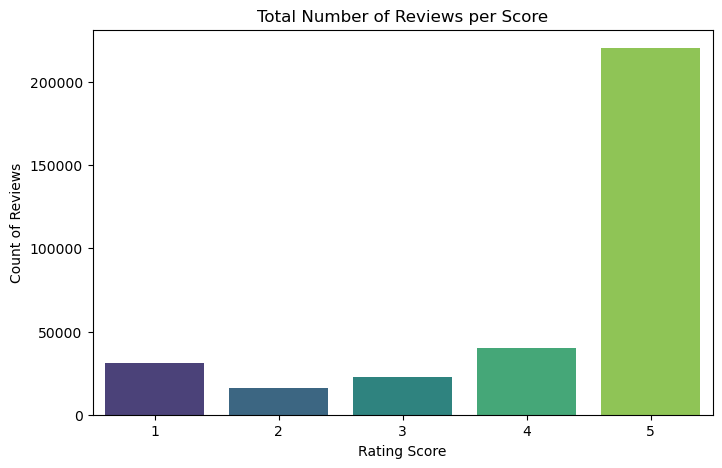

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/lemmatized_reviews.csv")

plt.figure(figsize=(8, 5))
sns.countplot(x='Score', data=df, palette='viridis')

plt.title('Total Number of Reviews per Score')
plt.xlabel('Rating Score')
plt.ylabel('Count of Reviews')
plt.show()

BOX PLOT

C:\Users\aniru_yl2f0b8\AppData\Local\Temp\ipykernel_8364\3710940245.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Score', y='word_count', data=df, palette='Set3')


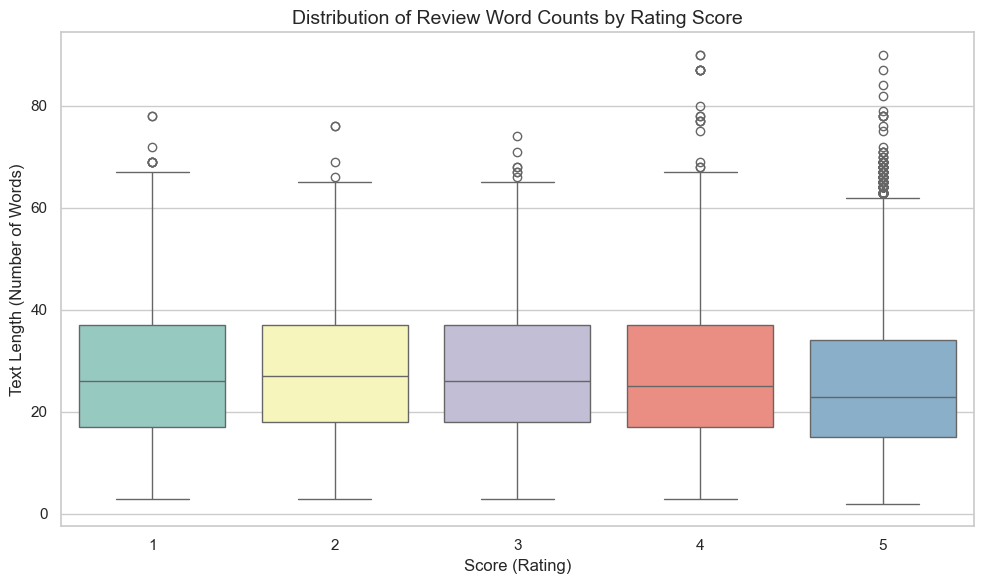

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
df = pd.read_csv("data/lemmatized_reviews.csv")

# 2. Create a numerical column for text length
# We use 'len(x.split())' to count the number of words
df['word_count'] = df['Text'].astype(str).apply(lambda x: len(x.split()))

# 3. Initialize the plot style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# 4. Create the boxplot
# x is your categorical Score, y is the numerical word count
sns.boxplot(x='Score', y='word_count', data=df, palette='Set3')

# 5. Add labels and title
plt.title('Distribution of Review Word Counts by Rating Score', fontsize=14)
plt.xlabel('Score (Rating)', fontsize=12)
plt.ylabel('Text Length (Number of Words)', fontsize=12)

# Optional: Adjust the y-axis if you have extreme outliers 
# plt.ylim(0, 500) 

# 6. Save and show the plot
plt.tight_layout()
plt.show()

DISPLAY SAMPLE REVIEWS

In [67]:
df = pd.read_csv("data/lemmatized_reviews.csv")

# Sort unique scores to display them in order (1 to 5)
scores = sorted(df['Score'].unique())

print("--- SAMPLE REVIEWS PER RATING ---")

for score in scores:
    print(f"\n{'='*20}")
    print(f"RATING: {score}")
    print(f"{'='*20}")
    
    # Get up to 5 samples for the current rating
    samples = df[df['Score'] == score]['Text'].head(5)
    
    if samples.empty:
        print("No reviews found for this category.")
    else:
        for i, review in enumerate(samples, 1):
            # Using strip() to remove any stray newlines
            print(f"{i}. {str(review).strip()}")

--- SAMPLE REVIEWS PER RATING ---

RATING: 1
1. cat happily eating felidae platinum two year got new bag shape food different tried new food first put bowl bowl sit full kitty not touch food ive noticed similar review related formula change past unfortunately need find new food cat eat
2. candy red no flavor plan chewy would never buy
3. arrived 6 day stale could not eat 6 bag
4. no tea flavor whole brunch artifial flavor not returnable wasted 20 buck
5. single sell 250 336 store 1 box 24 single im not sure amazon selling 999 box 24 single hazelnut coffee creamer favorite truly not good buy

RATING: 2
1. looking secret ingredient robitussin believe found got addition root beer extract ordered good made cherry soda flavor medicinal
2. purchased mango flavor doesnt take like mango no hint sweetness unfortunately hint aftertaste almost like licorice ive consuming various sport nutrition product decade im familiar come like taste product ive tried mango flavor one least appealing ive taste

Creating a Balanced Dataset for initial training and prototyping

In [68]:
df["Score"].value_counts()

Score
5    220365
4     40132
1     31028
3     22559
2     15902
Name: count, dtype: int64

In [69]:
df.columns

Index(['Score', 'Text'], dtype='object')

In [70]:
import pandas as pd

# 1. Decide on a total dataset size (e.g., 5000 rows)
total_size = 10000 

# 2. Define your desired distribution percentages
dist = {
    1: 0.10,  # 10%
    2: 0.15,  # 15%
    3: 0.25,  # 25%
    4: 0.30,  # 30%
    5: 0.20   # 20%
}

# 3. Sample from each group based on the percentages
frames = []
for score, percent in dist.items():
    n_samples = int(total_size * percent)
    # Filter for the specific score and sample the required amount
    sample = df[df['Score'] == score].sample(n=n_samples, random_state=42)
    frames.append(sample)

# 4. Combine them into your new imbalanced dataset
df_custom_imbalanced = pd.concat(frames).sample(frac=1).reset_index(drop=True)

# 5. Verify the results
print("Custom Imbalanced Distribution:")
print(df_custom_imbalanced['Score'].value_counts(normalize=True) * 100)

Custom Imbalanced Distribution:
Score
4    30.0
3    25.0
5    20.0
2    15.0
1    10.0
Name: proportion, dtype: float64


In [72]:
df_custom_imbalanced.to_csv("data/Final_imbalanced_reviews.csv", index=False)

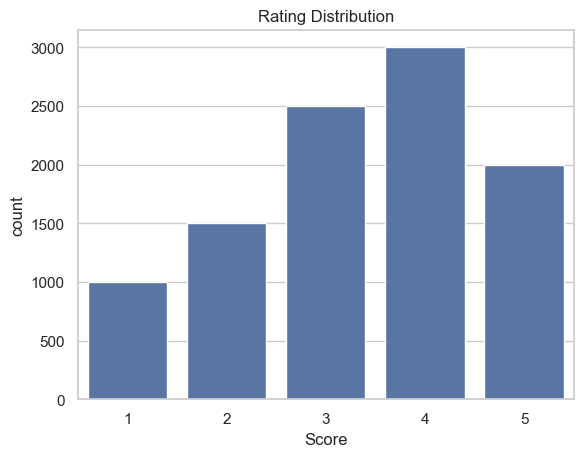

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="Score", data= pd.read_csv('data/Final_imbalanced_reviews.csv'))
plt.title("Rating Distribution")
plt.show()


SHUFFLED DATA

In [74]:
import pandas as pd

# Load the dataset
df = pd.read_csv("data/Final_imbalanced_reviews.csv")

# Shuffle the rows
# frac=1 means use 100% of the data
# random_state=42 ensures you get the same shuffle every time you run it (useful for debugging)
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the shuffled data
df_shuffled.to_csv("data/shuffled_imbalancedreviews.csv", index=False)

print("Data shuffled and saved!")

Data shuffled and saved!


SPLIT TRAIN TEST SPLIT

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("data/shuffled_imbalancedreviews.csv")

# Perform the train-test split
# test_size=0.2 sets the test set to 20% and train set to 80%
# random_state=42 ensures the split is reproducible
train_df, test_df = train_test_split(df, test_size=0.20, random_state=42)

# Save the split datasets
train_df.to_csv("train_imbreviews.csv", index=False)
test_df.to_csv("test_imbreviews.csv", index=False)

print(f"Training set size: {len(train_df)} rows")
print(f"Testing set size: {len(test_df)} rows")

Training set size: 8000 rows
Testing set size: 2000 rows


In [76]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import shuffle

# --- STEP 4: Vectorization (The Critical Step) ---
# "Fit vectorizer only on the training set, then transform both sets"

vectorizer = TfidfVectorizer()

# 1. FIT & TRANSFORM on Training Data
# The model learns the vocabulary here.
X_train_vec = vectorizer.fit_transform(train_df)

# 2. TRANSFORM ONLY on Test Data
# We use the vocabulary learned from Train to convert Test.
# If the Test set has a word not in Train, it is ignored (correct behavior).
X_test_vec = vectorizer.transform(test_df)

print("\nVectorization Complete.")
print(f"Train Matrix: {train_df.shape}")
print(f"Test Matrix:  {test_df.shape}")

# Now X_train_vec and y_train are ready for your classifier (e.g., Naive Bayes, SVM)


Vectorization Complete.
Train Matrix: (8000, 2)
Test Matrix:  (2000, 2)
